In [111]:
import numpy as np
import matplotlib.pyplot as plt
import mineral as min 
from mineral import Mineral
import csv as csv 

class ExpansionTermicaMineral (Mineral):
    def __init__ (self, archivo):
        self.archivo=archivo
    def carga_datos (self):
        Temp = []
        Vol = []
        
        with open(self.archivo, 'r') as csv_file:
            next(csv_file)
            for linea in csv_file:
                datos = linea.strip().split(',')
                if len(datos) >= 2:
                    Temp.append(float(datos[0].strip()))  
                    Vol.append(float(datos[1].strip()))
            
        x=np.array(Temp)
        y=np.array(Vol)
        return [x, y] 
    def alpha (self):
        ejex=ExpansionTermicaMineral.carga_datos(self)[0]
        y=ExpansionTermicaMineral.carga_datos(self)[1]
        
        alphas=np.array([])
        for i in range(1,len(y)-1):
            derivada=((y[i+1]-y[i-1])/(ejex[i+1]-ejex[i-1]))
            alphas=np.append(alphas,((1/y[i])*derivada))
        error_relativo=[]
        for i in range(len(alphas)):
            iteracion=(-1)*(alphas[i]-alphas[i-1])/(alphas[i])
            error_relativo.append(iteracion)
        error=np.mean(error_relativo)

        ejex_nuevo = ejex[1:-1]
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        ax1.plot(ejex, y, color='purple')
        ax1.set_xlabel('Temperatura (°C)')
        ax1.set_ylabel('Volumen (cm³)')
        ax2.plot(ejex_nuevo, alphas, color='yellow')
        ax2.set_xlabel('Temperatura (°C)')
        ax2.set_ylabel('α (°C⁻¹)')
        ax1.set_title('V vs T')
        ax2.set_title('α vs T')
        return  fig, np.mean(alphas),error

(<Figure size 1000x400 with 2 Axes>, 1.8233786281805578e-05, 0.006150606164254169)


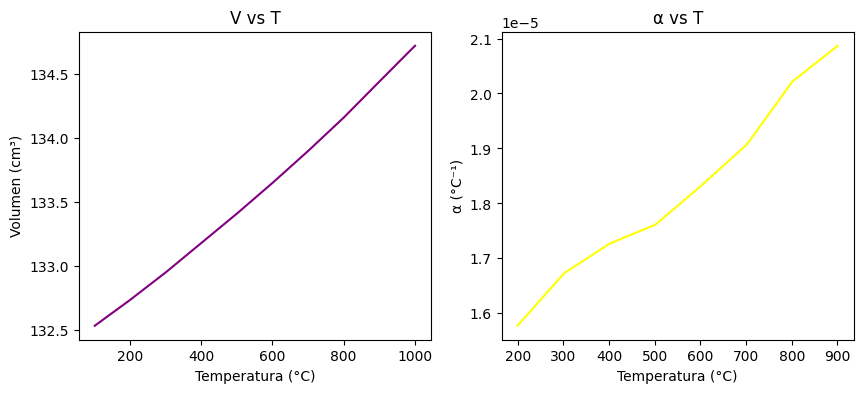

In [112]:
hola=ExpansionTermicaMineral("graphite_mceligot_2016.csv")
b=ExpansionTermicaMineral.alpha(hola)
print(b)